In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv("Salary_dataset.csv")
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
# Convert Salary into binary class based on median
median_salary = data['Salary'].median()

data['HighSalary'] = (data['Salary'] > median_salary).astype(int)

data.head()

,Unnamed: 0,YearsExperience,Salary,HighSalary
0,0,1.2,39344.0,0
1,1,1.4,46206.0,0
2,2,1.6,37732.0,0
3,3,2.1,43526.0,0
4,4,2.3,39892.0,0


In [4]:
X = data[['YearsExperience']]
y = data['HighSalary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [6]:
y_pred = model.predict(X_test)

In [7]:
y_prob = model.predict_proba(X_test)[:, 1]

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8333333333333334

Confusion Matrix:
[[2 0]
 [1 3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



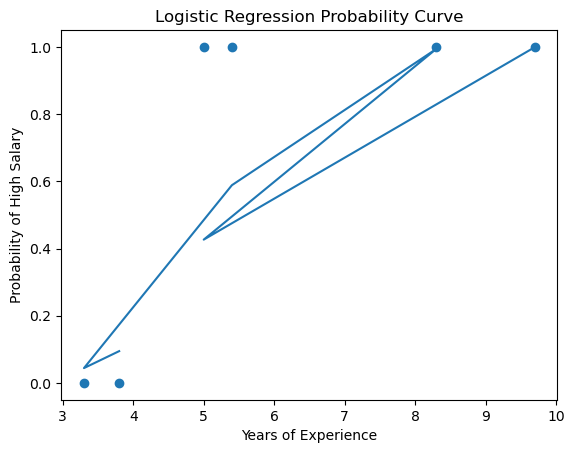

In [9]:
plt.figure()

plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict_proba(X_test)[:, 1])

plt.xlabel("Years of Experience")
plt.ylabel("Probability of High Salary")
plt.title("Logistic Regression Probability Curve")

plt.show()

In [10]:
new_exp = [[5]]

probability = model.predict_proba(new_exp)[0][1]
prediction = model.predict(new_exp)[0]

print("Probability of High Salary:", probability)
print("Predicted Class:", prediction)

Probability of High Salary: 0.42645314604621476
Predicted Class: 0


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
